<div class="alert alert-block alert-danger">

##  By:   Dalciana B. Waller


# Case: Marketing campaign optimization  


## Part 3) Prediction model proposal - Classification



In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
#from sklearn.grid_search import GridSearchCV   #Performing grid search
from sklearn.model_selection import GridSearchCV 

# Sklearn model selection
from sklearn.model_selection import RandomizedSearchCV

# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
dataf= pd.read_excel("ml_project1_data_df4.xlsx",index_col=[0])

#dataf=dataf.drop(0, axis=1)
dataf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
1,2174,1954,Graduation,Single,46344.000000,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,2237
3,6182,1984,Graduation,Together,26646.000000,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,2263
7,6177,1985,PhD,Married,33454.000000,1,0,32,76,10,...,4,8,0,0,0,0,0,0,0,2541
8,4855,1974,PhD,Together,30351.000000,1,0,19,14,0,...,2,9,0,0,0,0,0,0,1,2512
10,1994,1983,Graduation,Married,30354.292851,1,0,11,5,5,...,2,7,0,0,0,0,0,0,0,2350


In [9]:
dataf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Days_Customer'],
      dtype='object')

In [119]:
dataf.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,...,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,5593.716738,1971.457082,33978.402381,0.798283,0.463519,48.611588,34.830472,4.180258,18.908798,5.710300,...,3.094421,6.418455,0.064378,0.008584,0.001073,0.001073,0.002146,0.010730,0.087983,2441.109442
std,3235.832624,10.880134,11791.647351,0.490596,0.524133,29.038798,45.634202,6.180051,18.023473,7.111041,...,0.803918,1.610519,0.245556,0.092299,0.032756,0.032756,0.046299,0.103082,0.283422,197.227629
min,9.000000,1945.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2124.000000
25%,2736.000000,1965.000000,25434.750000,1.000000,0.000000,24.000000,7.000000,0.000000,7.000000,0.000000,...,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2262.000000
50%,5426.500000,1972.000000,33783.688773,1.000000,0.000000,48.500000,19.000000,2.000000,13.000000,3.000000,...,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2428.500000
75%,8372.250000,1979.000000,41647.500000,1.000000,1.000000,75.250000,43.000000,5.000000,23.000000,8.000000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2602.250000
max,11191.000000,1996.000000,86580.000000,2.000000,2.000000,99.000000,532.000000,51.000000,129.000000,43.000000,...,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2821.000000


In [85]:
"""
Feature variables selected in Part 1

"""
X_feat_selec= [ 'Recency', 'Days_Customer',  'AcceptedCmp3',
               'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumWebVisitsMonth',
               'NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases']   #Income???


In [86]:
#X = dataf.drop(["Response","ID", "Marital_Status", "Education"], axis=1) #independent columns

X = dataf[[ 'Recency', 'Days_Customer',  'AcceptedCmp3',
               'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumWebVisitsMonth',
               'NumCatalogPurchases', 'NumStorePurchases','NumWebPurchases' ]].copy()

In [11]:
y=dataf["Response"]


<div class="alert alert-block alert-info">

### 1) Classification Model building

</div>



In [16]:
## Splitting the train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=40)

In [17]:
X_train.head()

,Recency,Days_Customer,AcceptedCmp3,MntFruits,MntMeatProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
1776,87,2793,0,4,68,5,17,8,1,4,3
1152,61,2793,0,2,3,0,5,8,0,2,1
1962,19,2136,0,0,14,3,1,3,0,4,2
1939,48,2426,0,2,4,13,4,4,0,4,1
1176,24,2727,0,0,8,0,2,8,0,2,1


<div class="alert alert-block alert-info">

### 1) Logistic regression
</div>


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn import metrics

In [117]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred=logreg.predict(X_valid)


### 1.2)  Model evaluation


### #Confusion matrix



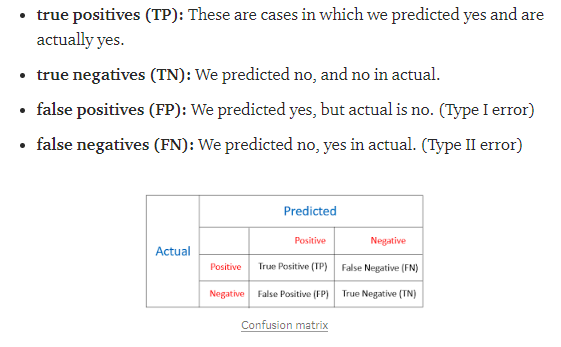

In [92]:
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)
cnf_matrix

array([[171,   0],
       [ 12,   4]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

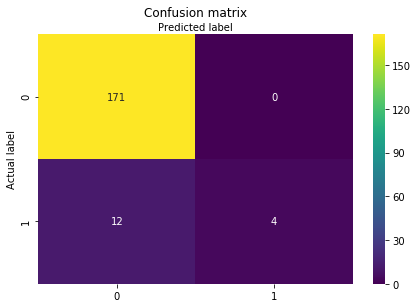

In [93]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [95]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))
print("Precision:",metrics.precision_score(y_valid, y_pred))
print("Recall:",metrics.recall_score(y_valid, y_pred))

print("F1_score:",metrics.precision_score(y_valid,y_pred))  

Accuracy: 0.9358288770053476
Precision: 1.0
Recall: 0.25
F1_score: 1.0


In [107]:
y_pred.size

187

Advantages and Disadvantages of Logistic Regression    

Advantages :
It is a widely used technique because it is very efficient, does not require too many computational resources, it’s highly interpretable, it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities.
Logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other. Therefore Feature Engineering plays an important role in regards to the performance of Logistic and also Linear Regression.
Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is also a good baseline that you can use to measure the performance of other more complex Algorithms.   

Disadvantages :
Logistic Regression is also not one of the most powerful algorithms out there and can be easily outperformed by more complex ones.
Also, we can’t solve non-linear problems with logistic regression since it’s decision surface is linear.
Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


<div class="alert alert-block alert-info">

###  2) Random Forest

Ensemble of decision trees
</div>

In [96]:
##### Training Random Forest and testing.

estimators = [10, 20, 50, 100, 250, 500, 1000]

i=1
rf_classifier1 = RandomForestClassifier(random_state= 0, 
                                       n_estimators=estimators[i], 
                                       max_leaf_nodes = 100)

rf_classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
## Validation
y_pred1= rf_classifier1.predict(X_valid)


In [98]:
# With another estimator parameter 
i=6
rf_classifier2 = RandomForestClassifier(random_state= 0, 
                                       n_estimators=estimators[i], 
                                       max_leaf_nodes = 100)

rf_classifier2.fit(X_train, y_train)

## Validation
y_pred2= rf_classifier2.predict(X_valid)

### 2.2)  Model evaluation


In [99]:
"""
  Model RF 1

"""
valid_error = mean_absolute_error(y_pred1, y_valid)

print("error: ", valid_error)


error:  0.0748663101604278


In [100]:
cnf_matrix1 = metrics.confusion_matrix(y_valid, y_pred1)
cnf_matrix1

array([[167,   4],
       [ 10,   6]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

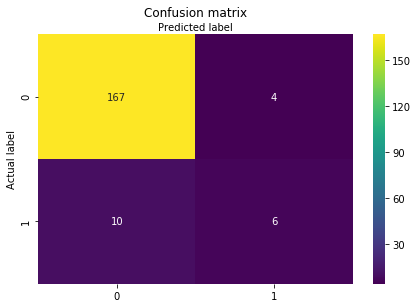

In [101]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
y_pred.shape

(187,)

In [102]:

"""
#Accuracy: Overall, how often is the classifier correct?
#Accuracy = (TP+TN)/total
"""
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred1))


"""
Precision
How accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted customers will buy the magazine 69% of the time.
"""
#Precision: When it predicts yes, how often is it correct?
#Precision=TP/predicted yes
print("Precision:",metrics.precision_score(y_valid, y_pred1))


"""
Recall or Sensitivity: If there are customers that bought the magazine in test data and your Logistic Regression model can identify it 85% of the time.
"""
#Recall/ sensitivity
print("Recall:",metrics.recall_score(y_valid, y_pred1))  


#F1 score
print("F1_score:",metrics.precision_score(y_valid,y_pred1))  

Accuracy: 0.9251336898395722
Precision: 0.6
Recall: 0.375
F1_score: 0.6


In [103]:
"""
  Model RF 2

"""
valid_error = mean_absolute_error(y_pred2, y_valid)

print("error: ", valid_error)


error:  0.06951871657754011


In [104]:
cnf_matrix2 = metrics.confusion_matrix(y_valid, y_pred2)
cnf_matrix2

array([[170,   1],
       [ 12,   4]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

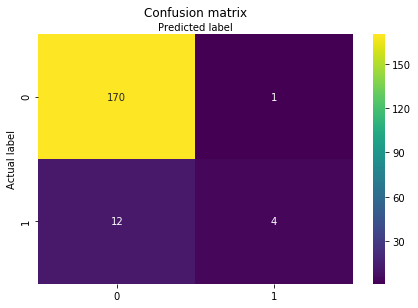

In [105]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [106]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred2))
print("Precision:",metrics.precision_score(y_valid, y_pred2))
print("Recall:",metrics.recall_score(y_valid, y_pred2))
print("F1_score:",metrics.precision_score(y_valid,y_pred2))  

Accuracy: 0.93048128342246
Precision: 0.8
Recall: 0.25
F1_score: 0.8



<div class="alert alert-block alert-info">

###  3) conclusion

</div>


== > Among the 3 models above, the best was the Logistic model. It shows the highest accuracy and f1 _score among them . 



Gain calculation with the new campaign : 


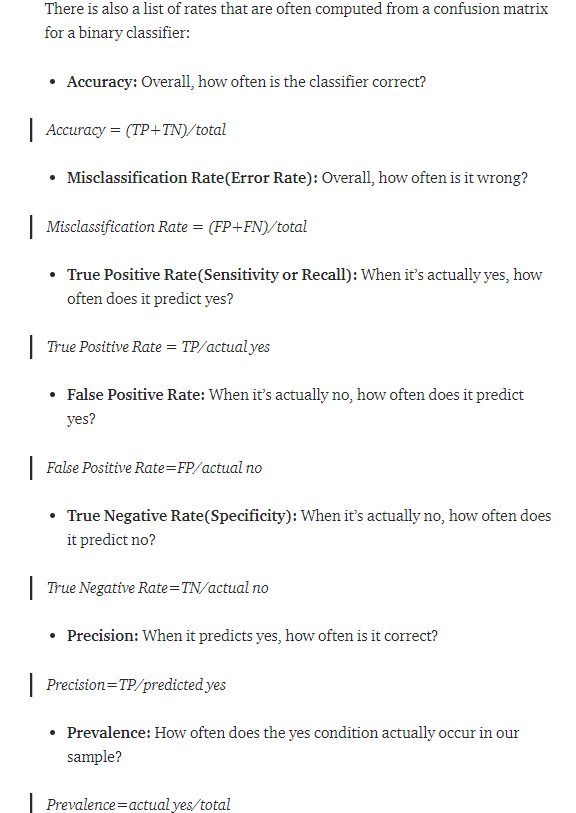